[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/NumEconNotebooks/master?urlpath=lab/tree/micro/04_Substitution_income_and_wealth_effects.ipynb)

# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets

import numecon.micro.consumption as consumption

# Static: Decomposition with exogenous income

The budget set is 

$$
C(p_1,p_2,I) = \{(x_1,x_2) \in \mathbb{R}_{+}^2 \,\, | \,\, p_1 x_1 + p_2 x_2 \leq I\}
$$

We normalize with $p_2 = 1$ and consider a change in $p_1$ to $p_1^{\prime}$.

A = ( 5.00, 5.00)
B = ( 3.54, 7.07)
C = ( 2.50, 5.00)


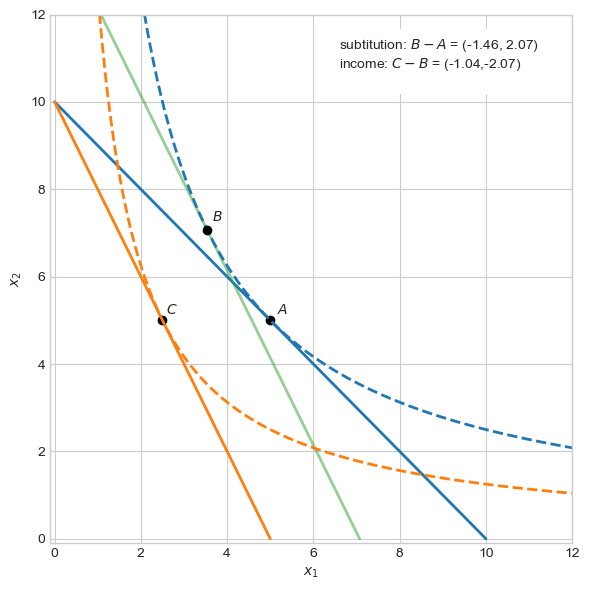

In [2]:
consumer = consumption.ConsumerClass(preferences='cobb_douglas')
fig,ax = consumer.figure()
A,B,C = consumer.plot_decomposition_exogenous(ax,p1_old=1,p1_new=2,p2=1)

print(f'A = ({A[0]:5.2f},{A[1]:5.2f})')
print(f'B = ({B[0]:5.2f},{B[1]:5.2f})')
print(f'C = ({C[0]:5.2f},{C[1]:5.2f})')

# Static: Decomposition with endogenous income

The budget set is 

$$
C(p_1,p_2,e_1,e_2) = \{(x_1,x_2) \in \mathbb{R}_{+}^2 \,\, | \,\, p_1 x_1 + p_2 x_2 \leq p_1 e_1 + p_2 e_2\}
$$

We normalize with $p_2 = 1$ and consider a change in $p_1$ to $p_1^{\prime}$.

A  = ( 5.00, 5.00)
B  = ( 3.54, 7.07)
C1 = ( 2.50, 5.00)
C2 = ( 4.00, 8.00)


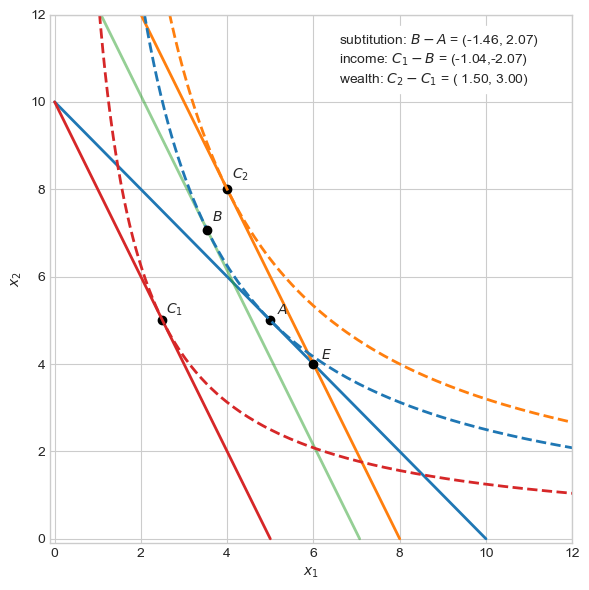

In [3]:
consumer = consumption.ConsumerClass(preferences='cobb_douglas')
fig,ax = consumer.figure()
A,B,C1,C2 = consumer.plot_decomposition_endogenous(ax,p1_old=1,p1_new=2,p2=1,e1=6,e2=4)

print(f'A  = ({A[0]:5.2f},{A[1]:5.2f})')
print(f'B  = ({B[0]:5.2f},{B[1]:5.2f})')
print(f'C1 = ({C1[0]:5.2f},{C1[1]:5.2f})')
print(f'C2 = ({C2[0]:5.2f},{C2[1]:5.2f})')

# Interactive: Cobb-Douglas

In [4]:
consumption.interactive_slutsky_exogenous(preferences='cobb_douglas')

interactive(children=(IntSlider(value=1, description='steps', max=3, min=1), FloatSlider(value=1.0, descriptio…

In [5]:
consumption.interactive_slutsky_endogenous(preferences='cobb_douglas')

interactive(children=(IntSlider(value=1, description='steps', max=4, min=1), FloatSlider(value=1.0, descriptio…

# Interactive: CES

In [6]:
consumption.interactive_slutsky_exogenous(preferences='ces')

interactive(children=(IntSlider(value=1, description='steps', max=3, min=1), FloatSlider(value=1.0, descriptio…

In [7]:
consumption.interactive_slutsky_endogenous(preferences='ces')

interactive(children=(IntSlider(value=1, description='steps', max=4, min=1), FloatSlider(value=1.0, descriptio…

# Deadweight loss

## Integration

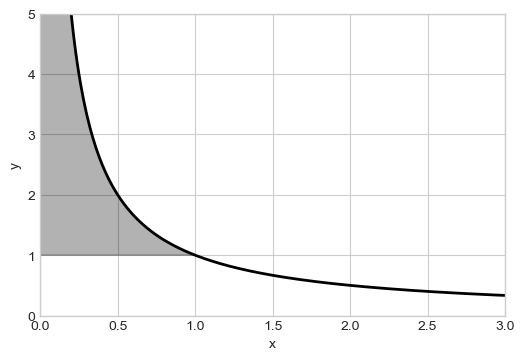

In [8]:
# a. calculations
x = np.linspace(1e-8,10,1000)
y = 1/x
I = x <= 1

# a. figure
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.plot(x,y,color='black',lw=2)
ax.fill_between(x[I],y[I],np.ones(np.sum(I)),color='black',alpha=0.3)
ax.set_xlim([0,3])
ax.set_ylim([0,5])
ax.set_xlabel('x')
ax.set_ylabel('y');

## Midpoint approximation of integral

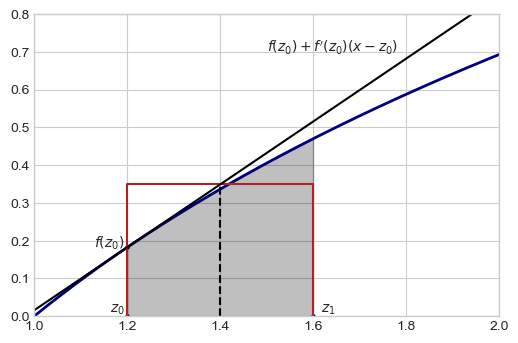

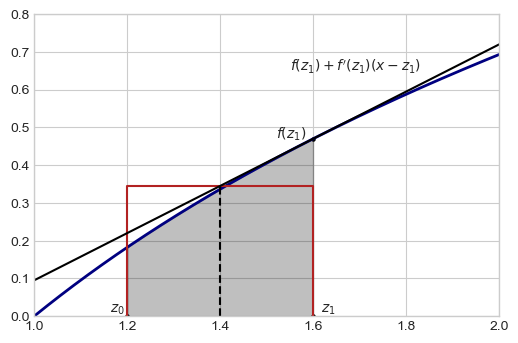

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# a. interval
x0 = 1
x1 = 2
z0 = 1.2
z1 = 1.6

# b. functions
f = lambda x: np.log(x)
f_prime = lambda x: 1/x

# c. points
x = np.linspace(1,2,1000)
y = f(x)

# d. box
width = z1-z0
midpoint = (z0+z1)/2
height = f(z0) + f_prime(z0)*0.5*width

# e. figure 
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1) 

ax.plot(x,y,lw=2,color='navy')
ax.plot([z0,z0,z1,z1],[0,height,height,0],color='firebrick')
ax.plot(x,f(z0)+f_prime(z0)*(x-z0),color='black')
ax.plot([midpoint,midpoint],[0,height],color='black',ls='--')

ax.scatter(z0,0,s=5,color='black')
ax.text(z0*0.97,0.01,'$z_0$',fontsize=10)
ax.scatter(z1,0,s=5,color='black')
ax.text(z1*1.01,0.01,'$z_1$',fontsize=10)
ax.scatter(z0,f(z0),s=5,color='black')
ax.text(z0*0.94,f(z0),'$f(z_0)$',fontsize=10)
ax.text(1.5,0.7,'$f(z_0)+f^{\\prime}(z_0)(x-z_0)$',fontsize=10)
I = (x >= z0) & (x <= z1)
ax.fill_between(x[I],y[I],color='black',alpha=0.25)

ax.set_xlim([1,2])
ax.set_ylim([0.0,0.8])

# f. box
width = z1-z0
midpoint = (z0+z1)/2
height = f(z1) - f_prime(z1)*0.5*width

# g. figure 
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1) 

ax.plot(x,y,lw=2,color='navy')
ax.plot([z0,z0,z1,z1],[0,height,height,0],color='firebrick')
ax.plot(x,f(z1)+f_prime(z1)*(x-z1),color='black')
ax.plot([midpoint,midpoint],[0,height],color='black',ls='--')

ax.scatter(z0,0,s=5,color='black')
ax.text(z0*0.97,0.01,'$z_0$',fontsize=10)
ax.scatter(z1,0,s=5,color='black')
ax.text(z1*1.01,0.01,'$z_1$',fontsize=10)
ax.scatter(z1,f(z1),s=5,color='black')
ax.text(z1*0.95,f(z1),'$f(z_1)$',fontsize=10)
ax.text(1.55,0.65,'$f(z_1)+f^{\\prime}(z_1)(x-z_1)$',fontsize=10)
I = (x >= z0) & (x <= z1)
ax.fill_between(x[I],y[I],color='black',alpha=0.25)

ax.set_xlim([1,2])
ax.set_ylim([0.0,0.8]);